In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 71.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 133.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 121.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 128.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 45.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138904 sha256=fb5aaf1b1bc3bb4e76be7ec4d84c3eda

In [2]:
import yfinance as yf

# Crear un objeto Ticker para Tesla (símbolo TSLA)
tesla = yf.Ticker("TSLA")

# Extraer la información histórica de Tesla y almacenarla en un DataFrame
tesla_data = tesla.history(period="max")

# Restablecer el índice
tesla_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  # Importa StringIO

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')


tables = pd.read_html(StringIO(str(soup)))
tesla_revenue = tables[0]  #


tesla_revenue.tail()

,Tesla Annual Revenue (Millions of US $),Tesla Annual Revenue (Millions of US $).1
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [12]:
import yfinance as yf

gme = yf.Ticker("GME")

gme_data = gme.history(period="max")


gme_data.reset_index(inplace=True)

gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [26]:
print(gme_revenue.columns)

Index(['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1'], dtype='object')


In [27]:
gme_revenue.rename(columns={'GameStop Quarterly Revenue (Millions of US $)': 'Revenue'}, inplace=True)
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True)  # Limpiar los datos de 'Revenue'
print(gme_revenue.tail())  # Mostrar las últimas cinco filas

       Revenue GameStop Quarterly Revenue (Millions of US $).1
57  2006-01-31                                          $1,667
58  2005-10-31                                            $534
59  2005-07-31                                            $416
60  2005-04-30                                            $475
61  2005-01-31                                            $709


In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


html_data = requests.get(url).text


soup = BeautifulSoup(html_data, 'html.parser')


tables = pd.read_html(str(soup))

gme_revenue = tables[1]

gme_revenue.rename(columns={
    'GameStop Quarterly Revenue (Millions of US $)': 'Revenue',
    'GameStop Quarterly Date': 'Date'
}, inplace=True)

gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.tail()

/tmp/ipykernel_592/1087700825.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


,Revenue,GameStop Quarterly Revenue (Millions of US $).1
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


In [32]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 109.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 102.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 10.4 MB/s eta 0:00:00


In [34]:
print(tesla_revenue.columns)

Index(['Tesla Annual Revenue (Millions of US $)', 'Tesla Annual Revenue (Millions of US $).1'], dtype='object')


In [35]:
tesla_revenue.columns = ['Date', 'Revenue']

In [36]:
print(tesla_revenue.head())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


In [39]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True)

# Convierte la columna 'Revenue' a tipo float
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)

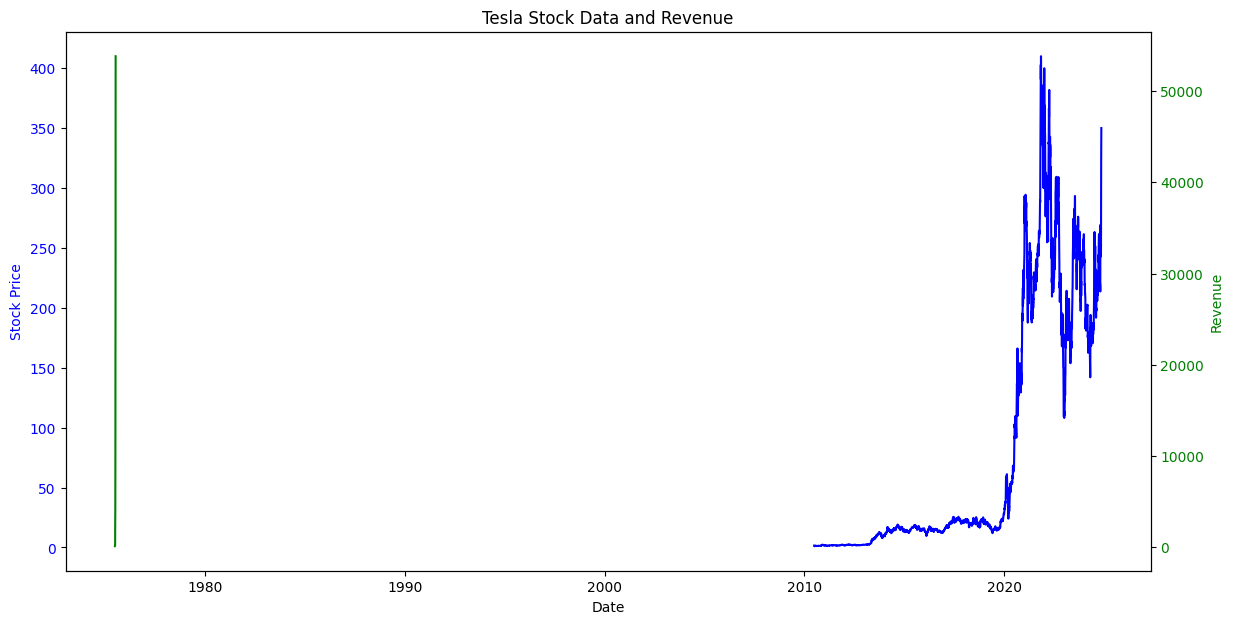

In [41]:
make_graph(tesla_data, tesla_revenue, "Tesla Stock Data and Revenue")

In [52]:
# Remover símbolos de dólar y comas en la columna Revenue
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True)

# Convertir la columna Revenue a float, ignorando errores
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Eliminar filas con valores NaN en la columna Revenue (si es necesario)
gme_revenue.dropna(subset=['Revenue'], inplace=True)

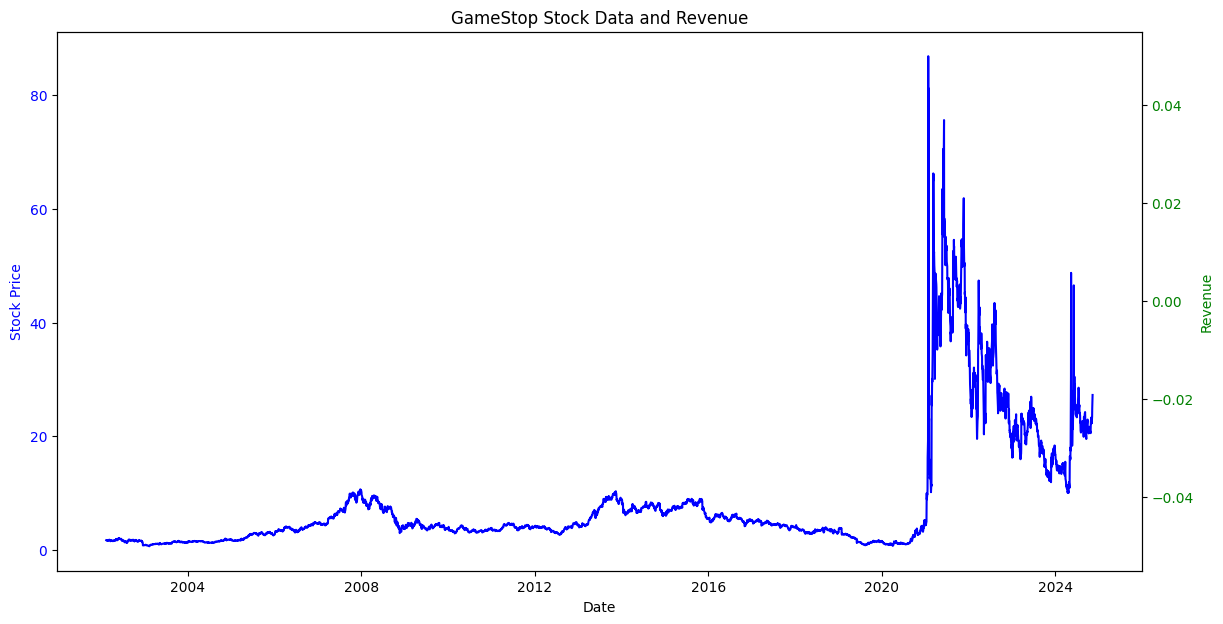

In [54]:
make_graph(gme_data, gme_revenue, "GameStop Stock Data and Revenue")